In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in data and get an idea of different trends that exist

In [30]:
data = pd.read_csv("../data/raw/employee_reviews.csv", index_col=0)

In [34]:
data.rename(index=str, columns={"job-title": "job_title", "advice-to-mgmt": "advice_to_mgmt",
                               "overall-ratings" : "overall_ratings", "work-balance-stars" : "work_balance_stars",
                               "culture-values-stars" : "culture_values_stars", "carrer-opportunities-stars" : "career_opportunities_stars",
                               "comp-benefit-stars" : "comp_benefit_stars", "senior-mangemnet-stars" : "senior_management_stars",
                               "helpful-count" : "helpful_count"}, inplace=True)

In [35]:
print(data["company"].count())
data = data.dropna()
print(data["company"].count())

67122
67122


In [50]:
data = data.loc[data["work_balance_stars"] != "none"]
data = data.loc[data["culture_values_stars"] != "none"]
data = data.loc[data["career_opportunities_stars"] != "none"]
data = data.loc[data["comp_benefit_stars"] != "none"]
data = data.loc[data["senior_management_stars"] != "none"]

In [51]:
data = data.astype(dtype={"work_balance_stars":float, "culture_values_stars": float, "career_opportunities_stars":float,
                         "comp_benefit_stars":float, "senior_management_stars":float, "helpful_count":float})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52918 entries, 1 to 66986
Data columns (total 16 columns):
company                       52918 non-null object
location                      52918 non-null object
dates                         52918 non-null object
job_title                     52918 non-null object
summary                       52918 non-null object
pros                          52918 non-null object
cons                          52918 non-null object
advice_to_mgmt                52918 non-null object
overall_ratings               52918 non-null float64
work_balance_stars            52918 non-null float64
culture_values_stars          52918 non-null float64
career_opportunities_stars    52918 non-null float64
comp_benefit_stars            52918 non-null float64
senior_management_stars       52918 non-null float64
helpful_count                 52918 non-null float64
link                          52918 non-null object
dtypes: float64(7), object(9)
memory usage: 6.9+ MB


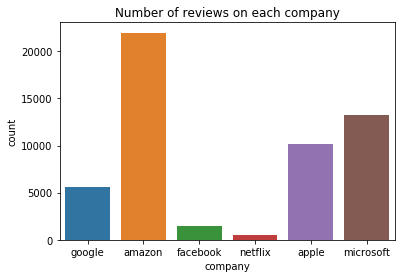

In [52]:
sns.countplot(x="company", data=data)
plt.title("Number of reviews on each company")
plt.show()

We can see that amazon has the most reviews and netflix the least. Hence, we need top keep in mind that our data is quite unbalanced for the different groups.
I think we need to start looking at the reviews for each of the different companies and take it from there.

## Overall rating

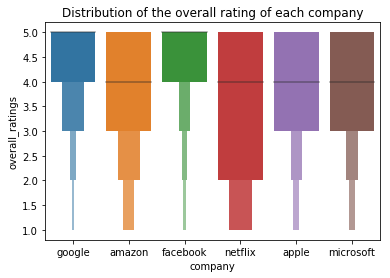

In [53]:
sns.boxenplot(x = "company", y="overall_ratings", data=data)
plt.title("Distribution of the overall rating of each company")
plt.show()

Seems like Netflix has more lower ratings, and Facebook and Google have the highest values. Apple and Microsoft seem to have a similar distribution.
Let's look at the individual ratings ...

## Work/Life Balance Rating

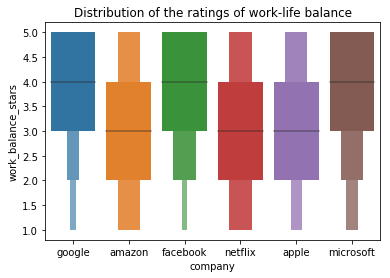

In [54]:
sns.boxenplot(x = "company", y="work_balance_stars", data=data)
plt.title("Distribution of the ratings of work-life balance")
plt.show()

Seems like the employees of google felt like they had the best work/life balance. Google is closely followed by Microsoft, whereas the employees of Amazon gave the lowest ratings to their work/life balance.

## Culture and Values Rating

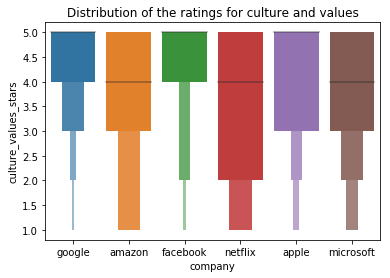

In [61]:
sns.boxenplot(x = "company", y="culture_values_stars", data=data)
plt.title("Distribution of the ratings for culture and values")
plt.show()

Employees of Facebook gave by far the best reviews for culture and values, whereas the employes at Netflix gave the worst reviews.

## Career Opportunities rating

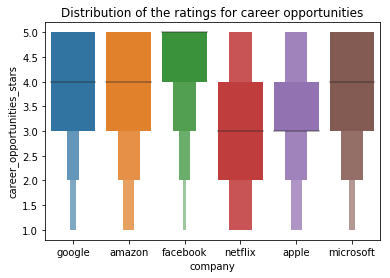

In [59]:
sns.boxenplot(x = "company", y="career_opportunities_stars", data=data)
plt.title("Distribution of the ratings for career opportunities")
plt.show()

It's clear that employees at Facebook feel they have the most career opportunities. Google, Amazon and Microsoft seem to have a similar distribution, whereas employees at Netflix only feel that they have average career opportunities. 

## Compensation and Benefits rating

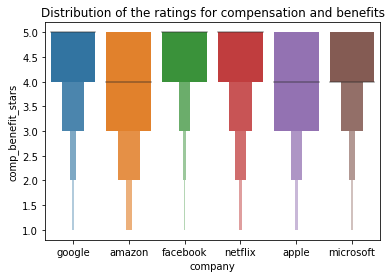

In [62]:
sns.boxenplot(x = "company", y="comp_benefit_stars", data=data)
plt.title("Distribution of the ratings for compensation and benefits")
plt.show()

Employees at Facebook are the most satisfied with compensation and benefits, and Facebook is closely followed by Google, Netflix, and Microsoft.

## Senior Management Rating

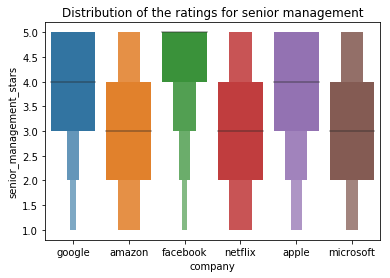

In [63]:
sns.boxenplot(x = "company", y="senior_management_stars", data=data)
plt.title("Distribution of the ratings for senior management")
plt.show()

Senior management is best rated Facebook, closely followed by Apple and Google.

## Helpful Count

How many people found this review useful.

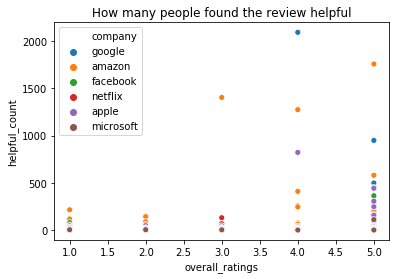

In [79]:
sns.scatterplot(x = "overall_ratings", y = "helpful_count",  hue = "company", data=data)
plt.title("How many people found the review helpful")
plt.show()

In [57]:
data.columns

Index(['company', 'location', 'dates', 'job_title', 'summary', 'pros', 'cons',
       'advice_to_mgmt', 'overall_ratings', 'work_balance_stars',
       'culture_values_stars', 'career_opportunities_stars',
       'comp_benefit_stars', 'senior_management_stars', 'helpful_count',
       'link'],
      dtype='object')

In [68]:
data.head(100)

,company,location,dates,job_title,summary,pros,cons,advice_to_mgmt,overall_ratings,work_balance_stars,culture_values_stars,career_opportunities_stars,comp_benefit_stars,senior_management_stars,helpful_count,link
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0.0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094.0,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949.0,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498.0,https://www.glassdoor.com/Reviews/Google-Revie...
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49.0,https://www.glassdoor.com/Reviews/Google-Revie...
6,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,none,5.0,4.0,4.0,4.0,5.0,4.0,1.0,https://www.glassdoor.com/Reviews/Google-Revie...
7,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,none,5.0,5.0,4.0,4.0,5.0,4.0,0.0,https://www.glassdoor.com/Reviews/Google-Revie...
8,google,none,"Dec 11, 2018",Former Employee - Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,none,5.0,5.0,5.0,5.0,5.0,5.0,0.0,https://www.glassdoor.com/Reviews/Google-Revie...
9,google,"New York, NY","Dec 10, 2018",Current Employee - Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,none,5.0,5.0,5.0,5.0,5.0,5.0,0.0,https://www.glassdoor.com/Reviews/Google-Revie...
10,google,none,"Dec 9, 2018",Current Employee - Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,none,5.0,5.0,5.0,5.0,5.0,5.0,0.0,https://www.glassdoor.com/Reviews/Google-Revie...


Ex employees vs current. How high up etc